In [1]:
# -*- coding: utf-8 -*-

# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

# Configuraciones
%matplotlib inline 
%pylab inline 

# Lectura de datos de peliculas
# movieTitles = pd.read_json('./netflixData/movieTitles.json', orient='columns')

# Mostrar Tabla de datos para datos de peliculas
# movieTitles.head()
    

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Lectura de datos de entrenamiento
##trainingSet = pd.read_csv("./netflixData/training_set.csv", sep=',', 
##                  names = ["ID_MOVIE", "ID_USUARIO", "RANKING", "DATE"])
trainingSet = pd.read_csv("./netflixData/training_set.csv", sep=',', 
                  names = ["ID_MOVIE", "ID_USUARIO", "RANKING"], usecols=[0,1,2])

# Mostrar Tabla de datos para datos de entrenamientos
trainingSet.head()

,ID_MOVIE,ID_USUARIO,RANKING
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3


In [3]:
# Verificar si algun campo tiene un tipo de datos null
# trainingSet.isnull().any()

In [4]:
# Union de datos de entrenamientos con información de peliculas
# trainingSetMerge = trainingSet.merge(movieTitles, on="ID_MOVIE")
# trainingSetMerge.head()

# Convertir DATE (?)
# trainingSet['DATE'] = trainingSet['date'].astype('datetime64[ns]')

In [5]:
# Comprobar tipos de datos
# trainingSet.dtypes

In [6]:
# Describir datos de entrenamiento
trainingSet.describe()

,ID_MOVIE,ID_USUARIO,RANKING
count,1.004805e+08,1.004805e+08,1.004805e+08
mean,9.070915e+03,1.322489e+06,3.604290e+00
std,5.131891e+03,7.645368e+05,1.085219e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.677000e+03,6.611980e+05,3.000000e+00
50%,9.051000e+03,1.319012e+06,4.000000e+00
75%,1.363500e+04,1.984455e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


In [7]:
# Promedio de ranking por pelicula
trainingSet.groupby('ID_MOVIE').mean()[['RANKING']]

,RANKING
ID_MOVIE,
1,3.749543
2,3.558621
3,3.641153
4,2.739437
5,3.919298
6,3.084396
7,2.129032
8,3.189805
9,2.621053


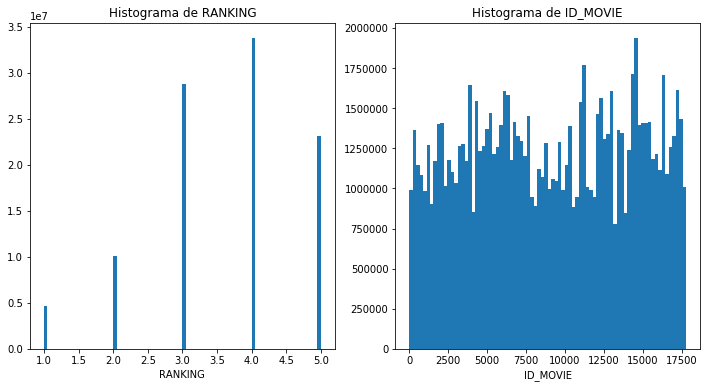

In [18]:
fig = plt.figure(figsize=(12,6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist( trainingSet.RANKING, bins=80 )
sqft.set_xlabel('RANKING')
sqft.set_title("Histograma de RANKING")

##sqft.hist( trainingSet.ID_MOVIE, bins=17500 )
##sqft.set_xlabel('ID_MOVIE')
##sqft.set_title("Histograma de ID_MOVIE")

#sqft.hist( trainingSet.ID_USUARIO, bins=80 )
#sqft.set_xlabel('ID_USUARIO')
#sqft.set_title("Histograma de ID_USUARIO")

# ----------------
##cost.hist( trainingSet.RANKING, bins=5 )
##cost.set_xlabel('RANKING')
##cost.set_title("Histograma de RANKING")

cost.hist( trainingSet.ID_MOVIE, bins=80 )
cost.set_xlabel('ID_MOVIE')
cost.set_title("Histograma de ID_MOVIE")

#cost.hist( trainingSet.ID_USUARIO, bins=80 )
#cost.set_xlabel('ID_USUARIO')
#cost.set_title("Histograma de ID_USUARIO")

##plt.show()

In [9]:
#g = sns.pairplot(trainingSet, hue='RANKING')

In [10]:
# Media del campo RANKING
# np.mean(trainingSet['RANKING'])

In [11]:
# Mediana del campo RANKING
# np.median(trainingSet['RANKING'])

In [12]:
# Desviacion tipica del campo RANKING
# np.std(trainingSet['RANKING'])

In [13]:
# Varianza del campo RANKING
# np.var(trainingSet['RANKING'])

In [14]:
# Correlacion
# trainingSet = pd.read_csv("./netflixData/training_set.csv", 
#                  names = ["ID_MOVIE", "ID_USUARIO", "RANKING"], usecols=[0,1,2])
                          
#tamanoFragmento = 10 ** 4
#strTmp = ""
#for fragmento in pd.read_csv('./netflixData/combined_data_1.csv', sep=',', chunksize=tamanoFragmento, names = ["ID_MOVIE", "ID_USUARIO", "RANKING"], usecols=[0,1,2]):
#    print(fragmento)
#    strTmp += np.corrcoef(fragmento)
#    print (strTmp)

In [15]:
trainingSet.tail()

,ID_MOVIE,ID_USUARIO,RANKING
100480502,17770,1790158,4
100480503,17770,1608708,3
100480504,17770,234275,1
100480505,17770,255278,4
100480506,17770,453585,2


In [16]:
#bb0 = trainingSet.select(['ID_MOVIE', 'RANKING'])
#bb0.scatter('ID_MOVIE')
#plots.ylim(1,5)
#plots.xlabel('Identificador pelicula')
#plots.ylabel('RANKING')

#plt.scatter(trainingSet['RANKING'], trainingSet['ID_MOVIE'], s=30, color='r')
#plt.xlim(1, 17770)
#plt.ylim(1, 5)
#plt.xlabel('RANKING')
#plt.ylabel('ID_MOVIE', rotation=0)

In [ ]:
plt.hist(pulso, bins=7)
plt.xlabel("latidos por minuto")
plt.ylabel("N° de mujeres")
plt.show()